# Final Project Part 2 Alexis Perez

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
weather = pd.read_csv('seattle-weather.csv')

In [3]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
weather["weather"].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [6]:
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


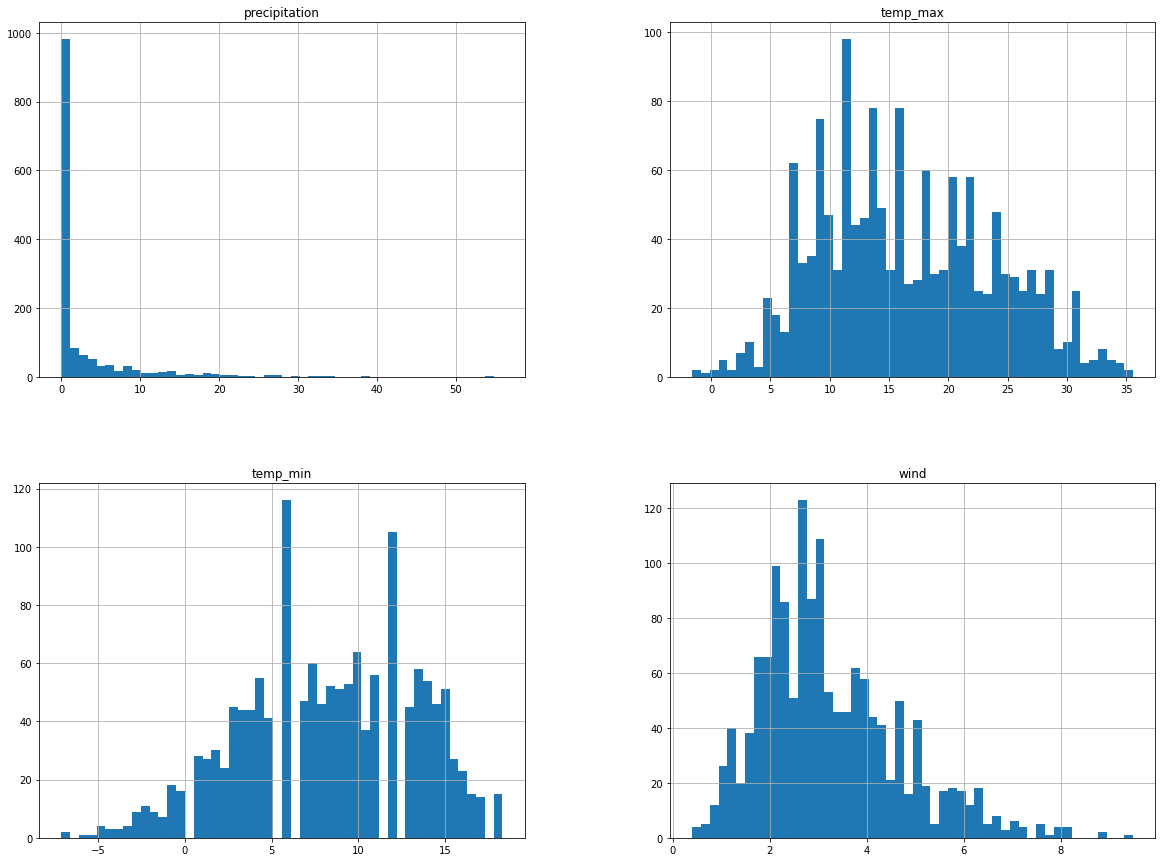

In [7]:
weather.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(weather, 0.2)
print(len(train_set), "train +", len(test_set), "test")

1169 train + 292 test


In [10]:
corr_matrix = weather.corr()

corr_matrix["precipitation"].sort_values(ascending=False)

precipitation    1.000000
wind             0.328045
temp_min        -0.072684
temp_max        -0.228555
Name: precipitation, dtype: float64

array([[<AxesSubplot:xlabel='precipitation', ylabel='precipitation'>,
        <AxesSubplot:xlabel='wind', ylabel='precipitation'>,
        <AxesSubplot:xlabel='temp_min', ylabel='precipitation'>,
        <AxesSubplot:xlabel='temp_max', ylabel='precipitation'>],
       [<AxesSubplot:xlabel='precipitation', ylabel='wind'>,
        <AxesSubplot:xlabel='wind', ylabel='wind'>,
        <AxesSubplot:xlabel='temp_min', ylabel='wind'>,
        <AxesSubplot:xlabel='temp_max', ylabel='wind'>],
       [<AxesSubplot:xlabel='precipitation', ylabel='temp_min'>,
        <AxesSubplot:xlabel='wind', ylabel='temp_min'>,
        <AxesSubplot:xlabel='temp_min', ylabel='temp_min'>,
        <AxesSubplot:xlabel='temp_max', ylabel='temp_min'>],
       [<AxesSubplot:xlabel='precipitation', ylabel='temp_max'>,
        <AxesSubplot:xlabel='wind', ylabel='temp_max'>,
        <AxesSubplot:xlabel='temp_min', ylabel='temp_max'>,
        <AxesSubplot:xlabel='temp_max', ylabel='temp_max'>]], dtype=object)

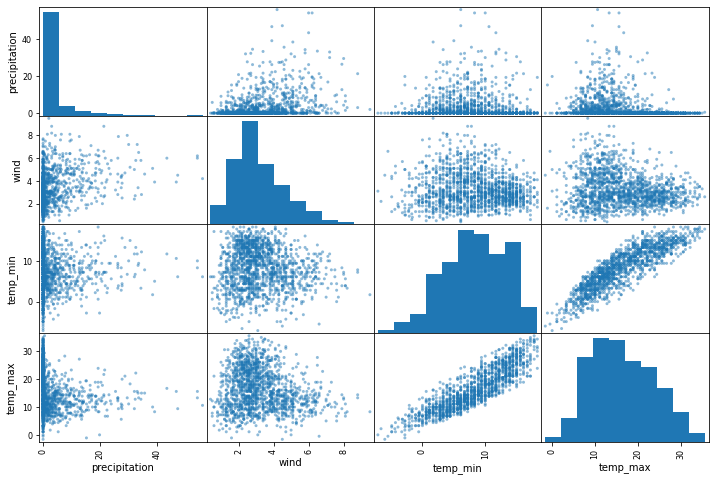

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["precipitation", "wind", "temp_min",
              "temp_max", "weather"]
scatter_matrix(weather[attributes], figsize=(12, 8))

In [12]:
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(weather['weather'])
weather["weather_cat"] = label
weather.drop("weather", axis=1, inplace=True)

In [13]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather_cat
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


# Perceptron Model (Classification)

In [33]:
X = weather.drop(columns=['weather_cat', 'date'])  
y = weather['weather_cat']

#create a heldout dataset for final testing only
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


perceptron_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #Use the "median" to impute missing vlaues
        ('std_scaler', StandardScaler()),
        ('perceptron', Perceptron(random_state=42))
    ])

perceptron_pipeline.fit(X_train, y_train)
preds = perceptron_pipeline.predict(X_test) 

[[ -9.387  -1.232  -0.876  -1.417]
 [-12.471  -2.142   1.321   0.889]
 [  6.449  -4.148   3.399  -0.8  ]
 [ -0.997  -5.61   -4.071   2.186]
 [-28.855   1.054  -2.379   1.734]]


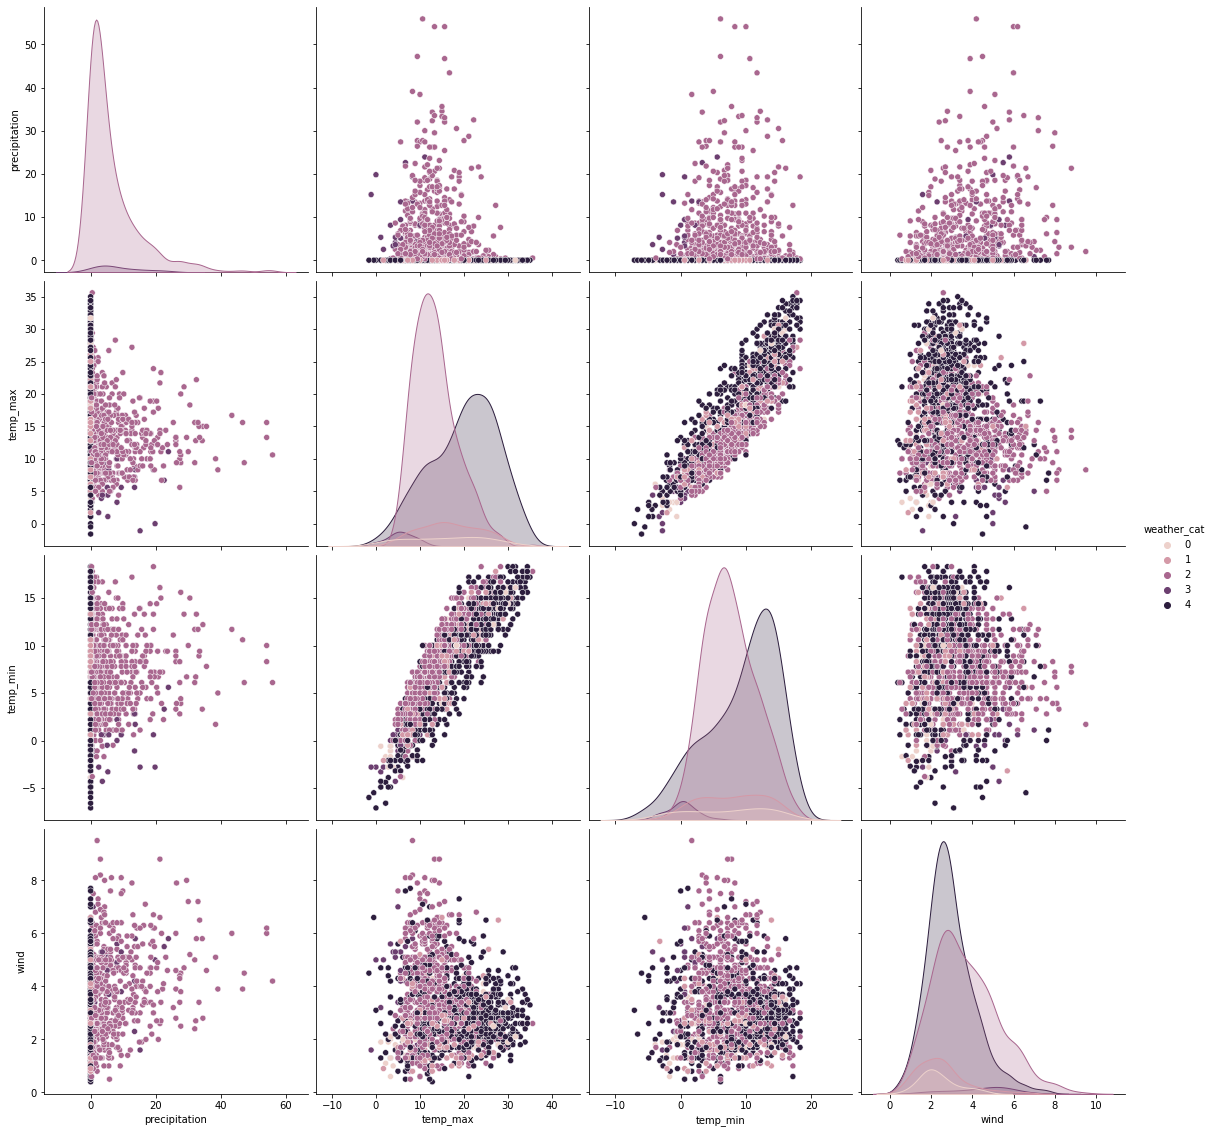

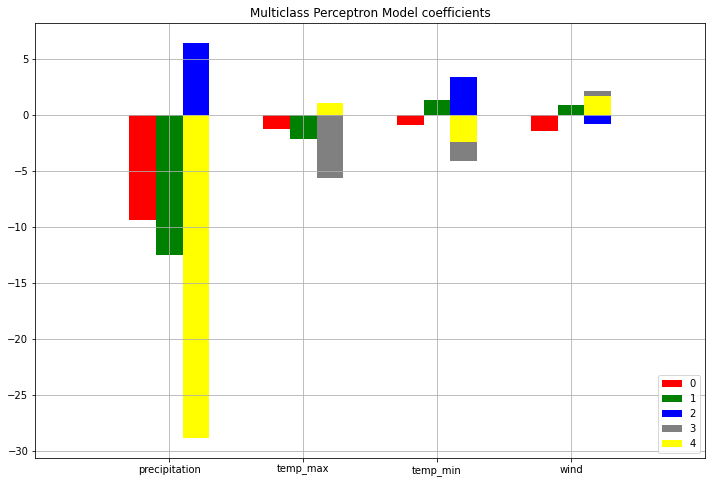

In [28]:
sns.pairplot(weather, hue="weather_cat", height=4);

model = perceptron_pipeline.named_steps['perceptron']
print(np.round(model.coef_,3))
plt.figure(figsize=(12, 8))
plt.bar(np.arange(model.coef_.shape[1]) - 0.2, model.coef_[0], color="red", width=0.2, label="0")
plt.bar(np.arange(model.coef_.shape[1]) - 0.0, model.coef_[1], color="green", width=0.2, label="1")
plt.bar(np.arange(model.coef_.shape[1]) + 0.2, model.coef_[2], color="blue", width=0.2, label="2")
plt.bar(np.arange(model.coef_.shape[1]) + 0.2, model.coef_[3], color="gray", width=0.2, label="3")
plt.bar(np.arange(model.coef_.shape[1]) + 0.2, model.coef_[4], color="yellow", width=0.2, label="4")
plt.xticks(np.arange(model.coef_.shape[1]), X.columns[:4], rotation=0)
plt.xlim([-1, model.coef_.shape[1]])
plt.title("Multiclass Perceptron Model coefficients")
plt.legend(loc="lower right");
plt.grid()

# Perceptron Accuracy Test

In [36]:
cv = KFold(3, random_state=42, shuffle=True)
cv_idx = cv.split(X)

pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('perceptron', SGDClassifier(loss = 'perceptron', random_state=42))
])

parameters = { 
    'perceptron__alpha': (10, 1, 0.1, 0.01, 0.001),
    'perceptron__penalty': ('l1', 'l2', 'elasticnet'),
}


grid_search = GridSearchCV(pipeline, parameters, cv=cv_idx, n_jobs=-1, verbose=1, )
grid_search.fit(X,y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
preds = grid_search.predict(X)
accuracy = accuracy_score(preds, y)

results = pd.DataFrame(columns=["Model", "Test Accuracy"])
results.loc[len(results)] = ["Perceptron", np.round(accuracy, 3)]
results

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best score: 0.831
Best parameters set:
	perceptron__alpha: 0.001
	perceptron__penalty: 'l1'


,Model,Test Accuracy
0,Perceptron,0.749
